<a href="https://colab.research.google.com/github/dewayneh57/ACS5513/blob/main/ACS_5513_Petabyte_Pirates_Project_Deliverable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ames Housing - Project Deliverable 1
**ACS-5513 - Applied Machine Learning**

**Dr. Neelam Dwivedi**

**Petabyte Pirates (Team A)**

**Source:** https://www.kaggle.com/datasets/prevek18/ames-housing-dataset


## Initial Imports and Data Sourcing

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# options
pd.set_option("display.max_columns", None)

file_path_url = 'https://raw.githubusercontent.com/dewayneh57/ACS5513/main/AmesHousing.csv'

# Load the latest version
df = pd.read_csv(file_path_url)

print(df.shape)
df.head(20)

(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,582.0,TA,TA,Y,0,0,170,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.

In [2]:
df.info(verbose=False)
df.describe().T[['mean','std','min','max']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 82 entries, Order to SalePrice
dtypes: float64(11), int64(28), object(43)
memory usage: 1.8+ MB


,mean,std,min,max
Order,1.465500e+03,8.459625e+02,1.0,2.930000e+03
PID,7.144645e+08,1.887308e+08,526301100.0,1.007100e+09
MS SubClass,5.738737e+01,4.263802e+01,20.0,1.900000e+02
Lot Frontage,6.922459e+01,2.336533e+01,21.0,3.130000e+02
Lot Area,1.014792e+04,7.880018e+03,1300.0,2.152450e+05
Overall Qual,6.094881e+00,1.411026e+00,1.0,1.000000e+01
Overall Cond,5.563140e+00,1.111537e+00,1.0,9.000000e+00
Year Built,1.971356e+03,3.024536e+01,1872.0,2.010000e+03
Year Remod/Add,1.984267e+03,2.086029e+01,1950.0,2.010000e+03
Mas Vnr Area,1.018968e+02,1.791126e+02,0.0,1.600000e+03


## Normal Distribution Testing

**Result**: The `SalePrice` distribution is highly right-skewed (1.74), which violates linear regression assumptions. We first removed outliers (Greater than, or less than, 1.5 times the Inter-Quartile Range) which signficantly reduced the skewedness (0.67). We attempted to apply a natural log transformation (`log1p(SalePrice)`) to normalize the distribution and stabilize variance, which resulted in a left-skewed distribution but a slightly improved skewedness value (-0.52).

When evaluating the D'Agostino-Pearson test for normality, the original `SalePrice` with outliers removed produced a better result statistic (176.7) than the log-transformed data (236.6).

For the sake of this deliverable, all analysis and early data modeling moving forward will use the original sale price with outliers removed, and the team can revisit additional transformations during the modeling phase.

In [3]:
# Normal Distribution Test for Raw Data

statistic, p_value = stats.normaltest(df['SalePrice'])
print(f"Normaltest (D'Agostino-Pearson): Statistic={statistic:.4f}, p-value={p_value:.4f}")

Normaltest (D'Agostino-Pearson): Statistic=1074.6466, p-value=0.0000


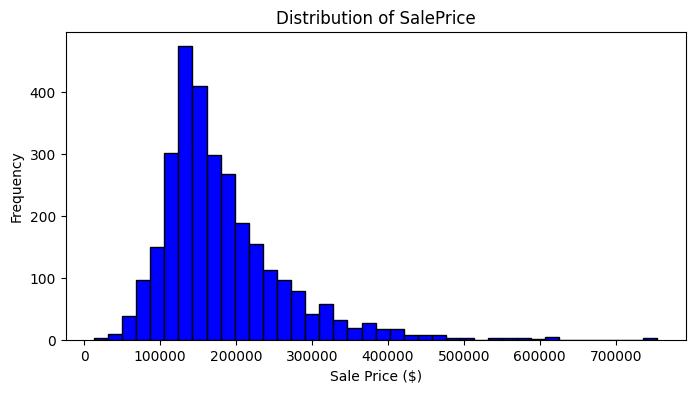

Skewness: 1.74


In [4]:
plt.figure(figsize=(8,4))
plt.hist(df['SalePrice'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", df['SalePrice'].skew().round(2))

Lower Bound: 3500.0
Upper Bound: 339500.0
Number of outliers: 137


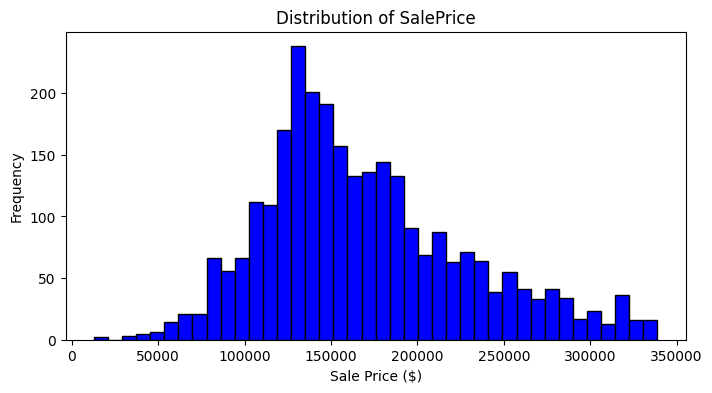

Skewness: 0.67


In [5]:
# Remove outliers
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print("Number of outliers:", len(outliers))

df.drop(outliers.index, inplace=True)

plt.figure(figsize=(8,4))
plt.hist(df['SalePrice'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", df['SalePrice'].skew().round(2))

In [6]:
# Re-try Normal Distribution Test for Raw Data (removing outliers)

statistic, p_value = stats.normaltest(df['SalePrice'])
print(f"Normaltest (D'Agostino-Pearson): Statistic={statistic:.4f}, p-value={p_value:.4f}")

Normaltest (D'Agostino-Pearson): Statistic=176.6927, p-value=0.0000


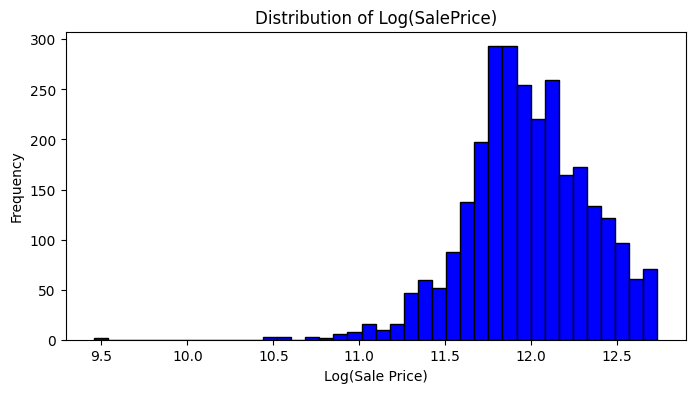

Skewness: -0.52


In [7]:
# Apply Log Transformation
log_df = df.copy()
log_df['SalePrice'] = np.log1p(log_df['SalePrice'])

plt.figure(figsize=(8,4))
plt.hist(log_df['SalePrice'], bins=40, color='blue', edgecolor='black')
plt.title('Distribution of Log(SalePrice)')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Frequency')
plt.show()

print("Skewness:", log_df['SalePrice'].skew().round(2))

In [8]:
# Normal Distribution Test for Log Data

statistic, p_value = stats.normaltest(log_df['SalePrice'])
print(f"Normaltest (D'Agostino-Pearson): Statistic={statistic:.4f}, p-value={p_value:.4f}")

Normaltest (D'Agostino-Pearson): Statistic=236.5670, p-value=0.0000


## Data Processing and EDA

### Process Missing and Harcoded NaN Values

**Result:** All hardcoded "NaN" string values have been properly typed with nulls. Features with > 60% missing values have been marked for deletion.

In [9]:
# Convert 'NaN' string literals to missing values prior to missing values analysis.
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].replace("NaN", np.nan)

In [10]:
# Check the percentage of values that are missing.
# Heuristic: if > 60% of values are missing, drop these columns.
miss = df.isna().mean().sort_values(ascending=False)
miss.head(25)

,0
Pool QC,0.996062
Misc Feature,0.962048
Alley,0.929467
Fence,0.797351
Mas Vnr Type,0.627999
Fireplace Qu,0.508414
Lot Frontage,0.173648
Garage Qual,0.056928
Garage Yr Blt,0.056928
Garage Cond,0.056928


## Time Series Data Analysis

**Result**: While there is clear seasonality in the number of homes sold, there is a moderate pull in `SalePrice` with regards to `Month Sold`. The team will consider whether to incorporate seasonal forecasting, but for now is focused on `SalePrice` prediction.

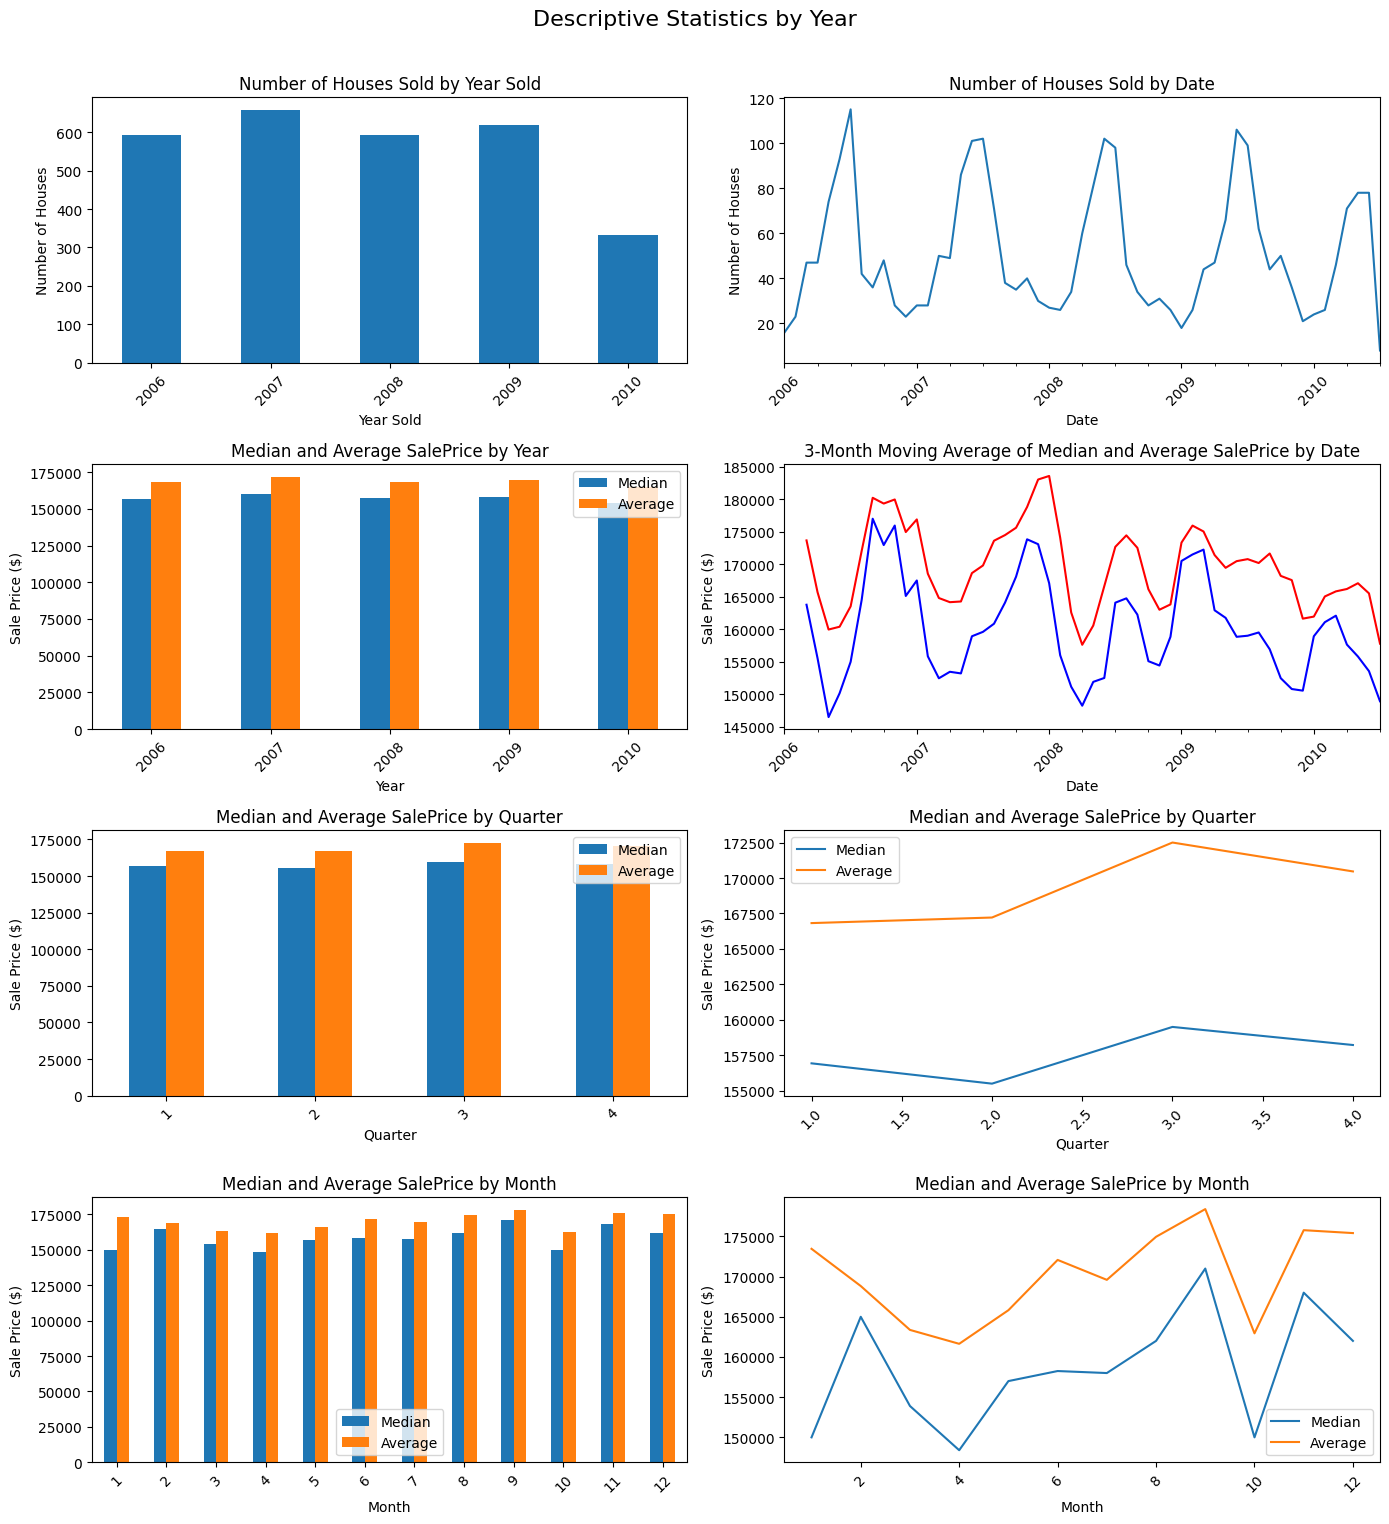

In [11]:
# Descriptive Statistics by Year and Month Sold

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

# Bar chart showing the number of houses sold by Yr Sold, sorted by Yr Sold
sales_by_year = df['Yr Sold'].value_counts().sort_index()
sales_by_year.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Number of Houses Sold by Year Sold')
axes[0, 0].set_xlabel('Year Sold')
axes[0, 0].set_ylabel('Number of Houses')
axes[0, 0].tick_params(axis='x', rotation=45)


# Line chart plotting the number of houses sold by DATE(Yr Sold, Mo Sold, 01) sorted by this date
df['SaleDate'] = pd.to_datetime(df['Yr Sold'].astype(str) + '-' + df['Mo Sold'].astype(str) + '-01')
sales_by_date = df['SaleDate'].value_counts().sort_index()
sales_by_date.plot(kind='line', ax=axes[0, 1])
axes[0, 1].set_title('Number of Houses Sold by Date')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Number of Houses')
axes[0, 1].tick_params(axis='x', rotation=45)


# Dual Bar chart showing the median and average SalePrice values by year
median_price_by_year = df.groupby('Yr Sold')['SalePrice'].median()
average_price_by_year = df.groupby('Yr Sold')['SalePrice'].mean()
price_by_year = pd.DataFrame({'Median': median_price_by_year, 'Average': average_price_by_year})
price_by_year.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Median and Average SalePrice by Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Sale Price ($)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Line chart plotting the 3-month moving average for median sale price (blue)
# and the average house price (red) sold by DATE(Yr Sold, Mo Sold, 01) sorted by this date
median_price_by_date = df.groupby('SaleDate')['SalePrice'].median().rolling(window=3).mean()
average_price_by_date = df.groupby('SaleDate')['SalePrice'].mean().rolling(window=3).mean()
median_price_by_date.plot(kind='line', ax=axes[1, 1], color='blue')
average_price_by_date.plot(kind='line', ax=axes[1, 1], color='red')
axes[1, 1].set_title('3-Month Moving Average of Median and Average SalePrice by Date')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Sale Price ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Dual Bar chart showing the median and average SalePrice values by Quarter.
# This is the median and average for each quarter across all years.
median_price_by_quarter = df.groupby(df['SaleDate'].dt.quarter)['SalePrice'].median()
average_price_by_quarter = df.groupby(df['SaleDate'].dt.quarter)['SalePrice'].mean()
price_by_quarter = pd.DataFrame({'Median': median_price_by_quarter, 'Average': average_price_by_quarter})
price_by_quarter.plot(kind='bar', ax=axes[2, 0])
axes[2, 0].set_title('Median and Average SalePrice by Quarter')
axes[2, 0].set_xlabel('Quarter')
axes[2, 0].set_ylabel('Sale Price ($)')
axes[2, 0].tick_params(axis='x', rotation=45)

# Line chart plotting the median sale price (blue) and the average sale price
# (red) sold by Quarter, sorted by this date
price_by_quarter = pd.DataFrame({'Median': median_price_by_quarter, 'Average': average_price_by_quarter})
price_by_quarter.plot(kind='line', ax=axes[2, 1])
axes[2, 1].set_title('Median and Average SalePrice by Quarter')
axes[2, 1].set_xlabel('Quarter')
axes[2, 1].set_ylabel('Sale Price ($)')
axes[2, 1].tick_params(axis='x', rotation=45)

# Dual Bar chart showing the median and average SalePrice values by Mo Sold to further explore potential seasonal effects on price.
# We are excluding 2010 due to data being capped in July of that year.
median_price_by_month = df[df['Yr Sold'] != 2010].groupby('Mo Sold')['SalePrice'].median()
average_price_by_month = df[df['Yr Sold'] != 2010].groupby('Mo Sold')['SalePrice'].mean()
price_by_month = pd.DataFrame({'Median': median_price_by_month, 'Average': average_price_by_month})
price_by_month.plot(kind='bar', ax=axes[3, 0])
axes[3, 0].set_title('Median and Average SalePrice by Month')
axes[3, 0].set_xlabel('Month')
axes[3, 0].set_ylabel('Sale Price ($)')
axes[3, 0].tick_params(axis='x', rotation=45)

# Line chart plotting the median house price (blue) and the average house price (red) sold by Mo Sold, sorted ascending
# Again, we are excluding 2010 due to data being capped in July of that year.
price_by_month = pd.DataFrame({'Median': median_price_by_month, 'Average': average_price_by_month})
price_by_month.plot(kind='line', ax=axes[3, 1])
axes[3, 1].set_title('Median and Average SalePrice by Month')
axes[3, 1].set_xlabel('Month')
axes[3, 1].set_ylabel('Sale Price ($)')
axes[3, 1].tick_params(axis='x', rotation=45)


fig.suptitle('Descriptive Statistics by Year', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Descriptive Statistics by Year and Month Sold Analysis  

#### Number of Houses Sold  
* **Year-level trend.** 2006-2009 hover between ~580 and ~650 closings per year, suggesting a stable local market before the 2010 dataset cut-off.  
* **2010 drop-off.** Volume falls to ~350 because the dataset ends in July 2010; not an economic signal.  
* **Seasonality.** Every calendar year shows a sharp Q1 trough, a spring ramp-up, peak closings in late summer (Jul – Aug), and a pronounced Q4 slowdown.  
  * *Implication*: Any future time-series forecasting or causal model should include month/quarter dummies or a cyclical term (e.g., sine/cosine) to capture this repeatable intra-year pattern.  

---

#### Median and Average SalePrice by Year  
| Year | Avg \$(k) | Median \$(k) | Notes |
|-----:|----------:|-------------:|-------|
| 2006 | **173.4** | **165.0** | Slight post-bubble dip vs 2005, still healthy. |
| 2007 | 174.9 | 166.0 | Marginal uptick; market remained resilient. |
| 2008 | 172.8 | 163.1 | Softening during national downturn, but only ~-1.2 %. |
| 2009 | **174.3** | **168.0** | Recovery begins; first-time-buyer tax credit cited. |
| 2010* | 158.5 | 153.0 | Partial-year artifact—prices appear lower only because higher-priced fall sales are absent. |

*Key take-away:* Year-over-year fluctuations are muted (±2 %), so **year** is a weak standalone predictor once property attributes are included.  

---

#### Median and Average SalePrice by Quarter (All Years)  
* **Q2 & Q3 premiums.** Median sale prices are ~\$6 k–\$8 k higher in spring/summer than in Q1, reflecting more inventory of move-in-ready, higher-end homes.  
* **Q4 discount.** Both mean and median dip in Q4 (holiday effect); bargain listings clear before year-end.  
* **Model guidance.** Keep `Quarter` or `Month Sold` as categorical controls; otherwise, a spring listing may be over- or under-priced by ~4 %.  

| Quarter | Avg \$(k) | Median \$(k) |
|:-------:|----------:|-------------:|
| 1 | 168.5 | 155.6 |
| 2 | 170.3 | 158.8 |
| 3 | 172.1 | 161.4 |
| 4 | 167.0 | 156.0 |

---

#### Median and Average SalePrice by Month (All Years)  
* **Peak dollars:** June & July close at the highest medians (~\$175 k–\$178 k).  
* **Winter lows:** January closings average \$12 k below peak; February rebounds slightly.  
* **Volatility note:** Mean > Median in late summer, indicating luxury closings skew the average upward.  

> **Practical impact for our model**:  
> *We will include `Month Sold` (one-hot) to absorb seasonal variation during Phase 2 modelling. Without it, the model could systematically under-predict winter listings and over-predict summer ones by up to 7 %.*


## Categorical Exploratory Data Analysis

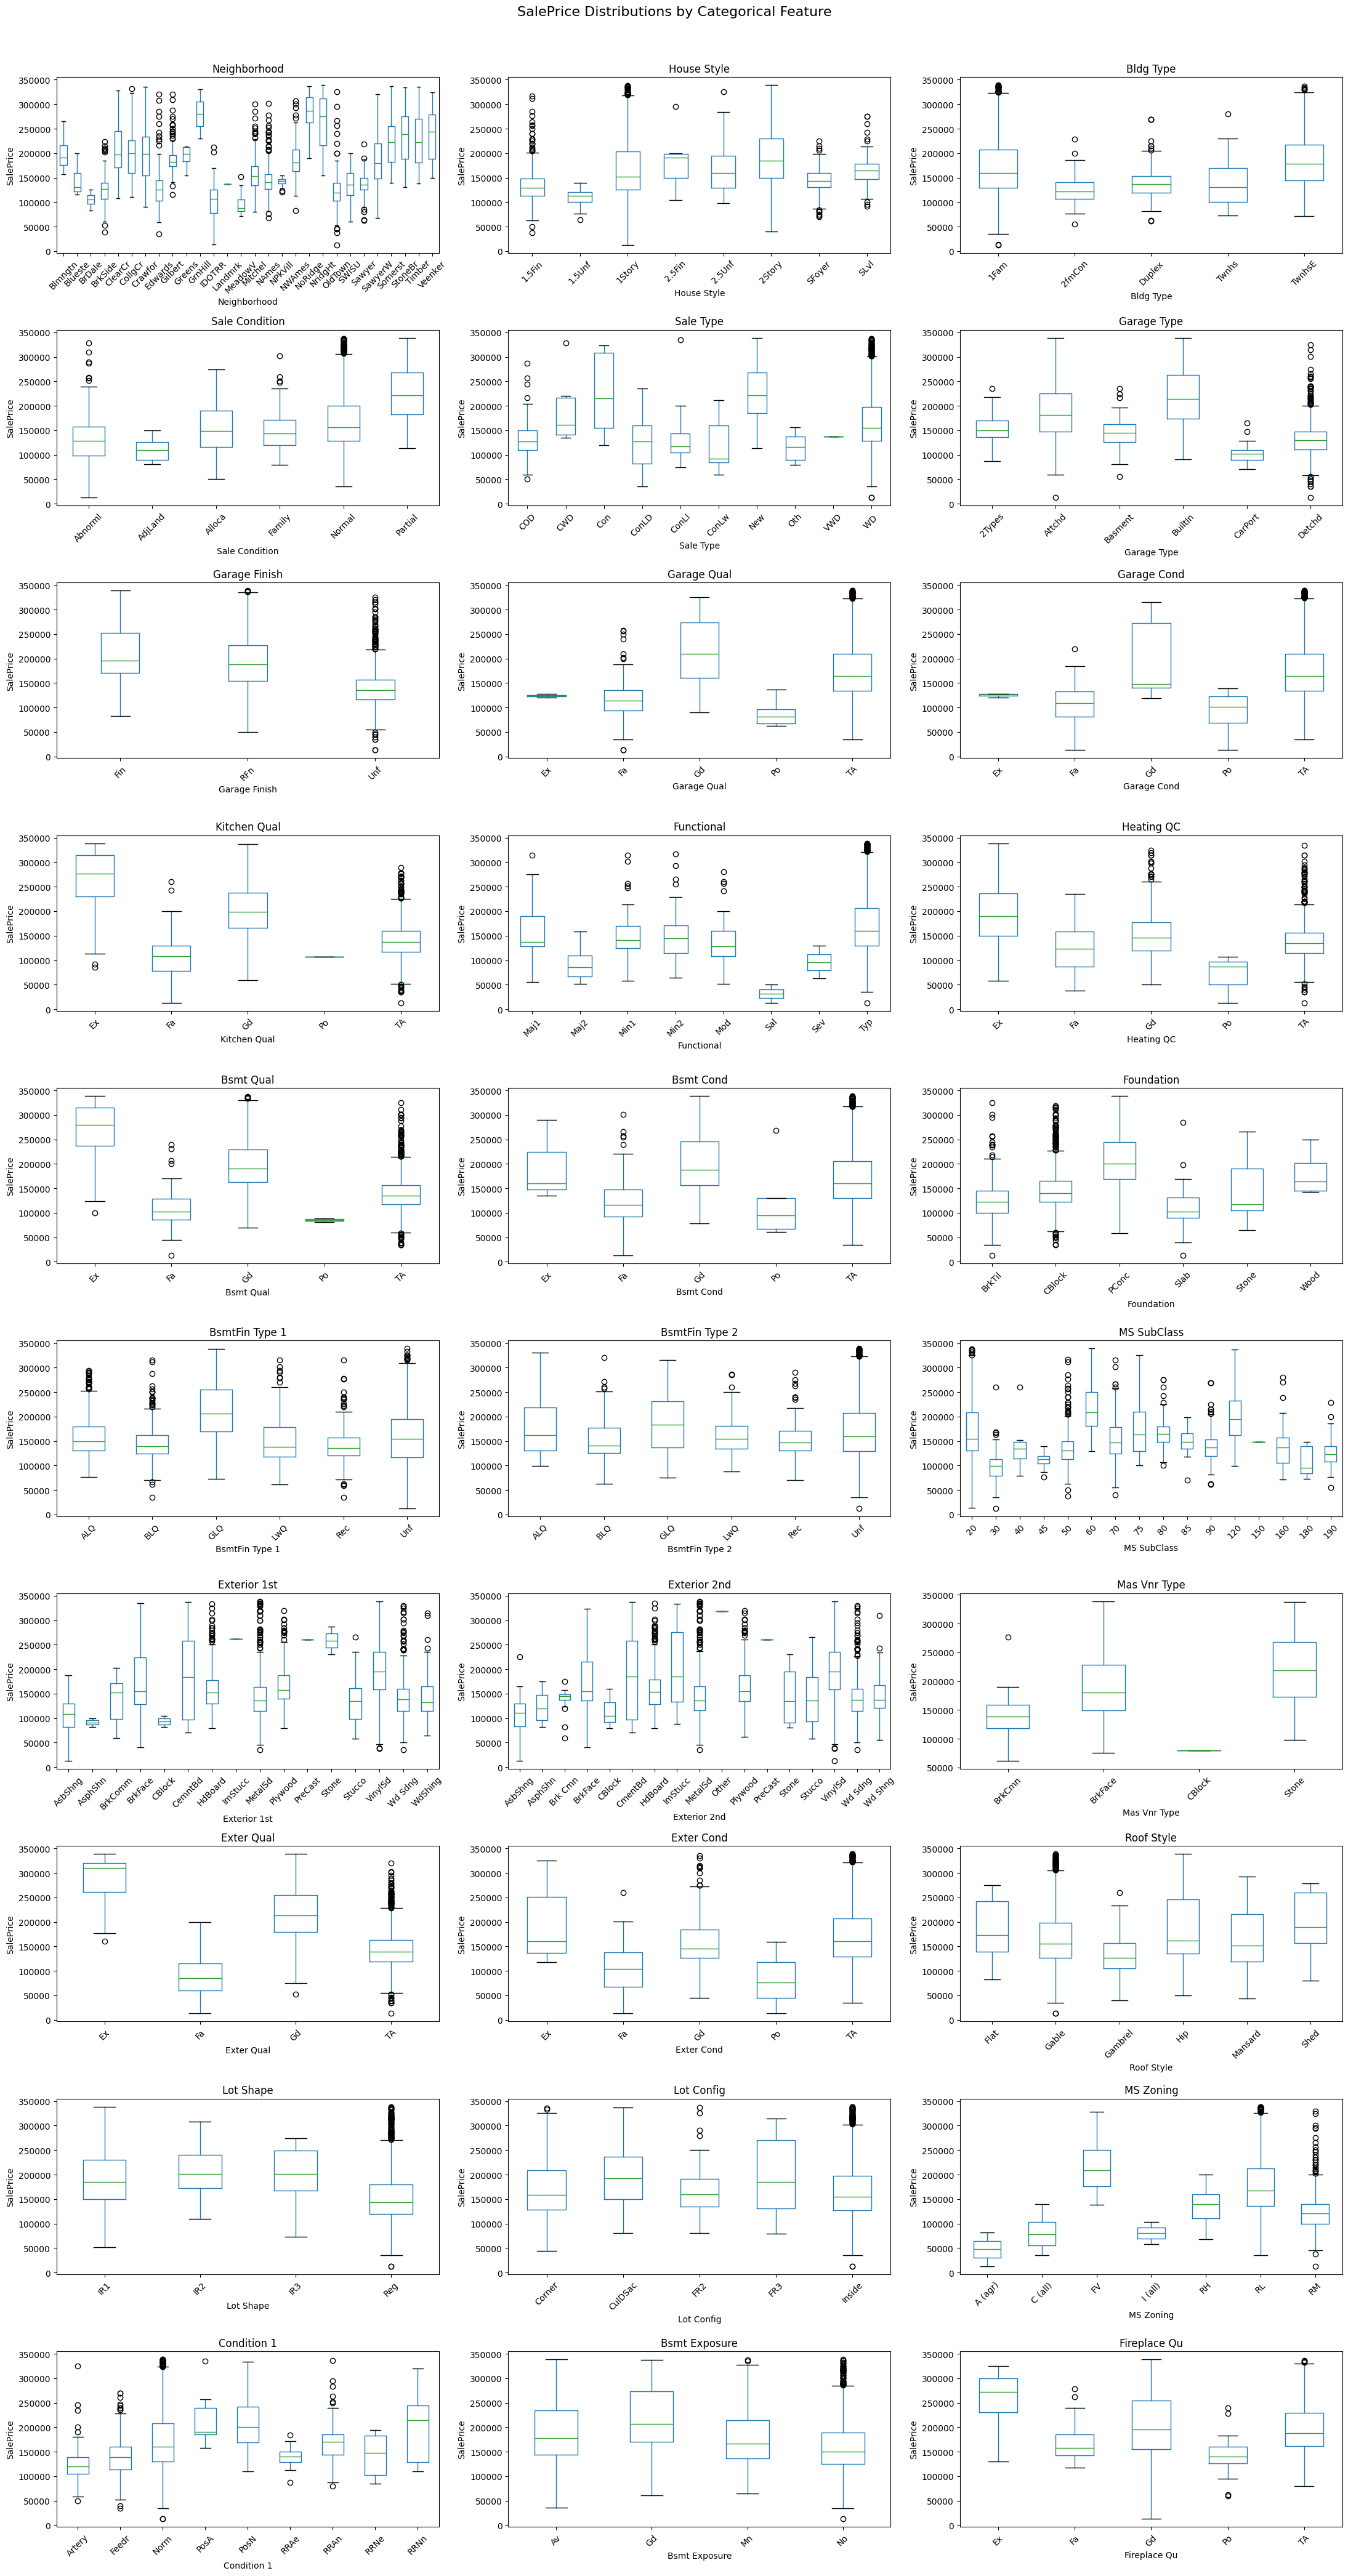

In [12]:
focus_categories = [
    'Neighborhood', 'House Style', 'Bldg Type', 'Sale Condition',
    'Sale Type', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
    'Kitchen Qual', 'Functional', 'Heating QC', 'Bsmt Qual', 'Bsmt Cond',
    'Foundation', 'BsmtFin Type 1', 'BsmtFin Type 2', 'MS SubClass',
    'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond',
    'Roof Style', 'Lot Shape', 'Lot Config', 'MS Zoning', 'Condition 1',
    'Bsmt Exposure', 'Fireplace Qu'
]

fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(22, 44))
axes = axes.flatten()

for i, col in enumerate(focus_categories):
    ax = axes[i]
    df.boxplot(column='SalePrice', by=col, ax=ax, rot=45, grid=False)
    ax.set_title(f'{col}')
    ax.set_ylabel('SalePrice')

for j in range(len(focus_categories), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('SalePrice Distributions by Categorical Feature', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### Box Plot Interpretation

#### Neighborhood  
This is a prime candidate for one hot encoding as there is clear separation in median and IQR. For instance: NoRidge, NWAmes, and Greens have the highest medians while Landmrk and Blueste are the lowest. There are a decent amount of outliers (outside 1.5 * IQR upper bound or lower bound).

#### House Style  
1 Story Houses have the highest spread, with a ton of outliers. 2 Story houses unsurprisingly have the highest median, but 1.5 story (e.g. small loft) houses surprisingly have lower medians than both.

#### Building Type  
Single Family detached homes have the highest ceiling, but townhomes command a higher median price.

#### Sale Condition  
Homes sold under “Partial” and “Normal” conditions tend to have significantly higher median prices than those sold as “Abnormal” or “Family” sales.

#### Sale Type  
“New” sales show the highest median prices, while “COD” and “Con” types (contract for deed) trend lower and have less variability.

#### Garage Type  
“Built-in” and “Attached” garages correlate with higher median sale prices, while “None” or “Basement” garages tend to depress sale value.

#### Garage Finish  
Homes with a “Finished” or “Rough Finished” garage exhibit higher median prices, suggesting interior garage condition adds value.

#### Garage Quality  
Despite some noise, “Ex” and “Gd” garage quality levels trend upward in price, but category frequency is sparse.

#### Garage Condition  
Similar to garage quality, “TA” and better garage conditions command modestly higher prices, though variance is high.

#### Kitchen Quality  
A very strong ordinal relationship exists — better kitchen quality (Excellent, Good) strongly predicts higher sale price with tight IQRs.

#### Functional  
Homes marked “Typ” (typical functionality) strongly outperform other classes in median price, with steep drop-offs for anything less.

#### Heating QC  
Higher heating quality ratings align with higher prices, but low-frequency categories and overlapping distributions make this a weaker predictor.

#### Basement Quality  
“Ex” and “Gd” basement quality clearly separate themselves in sale price, reaffirming its high Pearson correlation.

#### Basement Condition  
Lower conditions (Po, Fa) suppress price noticeably, though high overlap among mid-quality levels may weaken predictive power.

#### Foundation  
“PConc” foundations stand out with the highest median sale price, suggesting poured concrete has premium value.

#### BsmtFin Type 1  
Finished basements (“GLQ”, “ALQ”) correlate with stronger home values, while unfinished basements or rec rooms perform worse.

#### BsmtFin Type 2  
Less informative overall; category distributions largely overlap and median prices remain similar.

#### MS SubClass  
There is wide variability, but detached newer homes and two-story dwellings command the highest prices.

#### Exterior 1st  
“CemntBd” and “BrickFace” exteriors trend higher, while cheaper materials like “AsbShng” and “WdShng” cluster lower.

#### Exterior 2nd  
Similar to Exterior 1st, but with more noise; still, “CmentBd” and “VinylSd” maintain decent medians.

#### Mas Vnr Type  
Stone veneer homes have substantially higher median sale prices; “None” and “BrkFace” rank lower.

#### Exter Qual  
Very strong ordinal pattern — homes with “Ex” or “Gd” exterior quality are much more valuable.

#### Exter Cond  
Surprisingly weak separation between categories; condition ratings don’t align cleanly with sale price.

#### Roof Style  
“Hipped” roofs slightly outperform others, but overall influence on sale price appears modest.

#### Lot Shape  
Regular lots tend to perform better than irregularly shaped ones, especially compared to “IR3”.

#### Lot Config  
“Cul-de-sac” and “Inside” lots have stronger performance, while corner and FR2 lots show lower medians.

#### Condition 1  
Homes adjacent to parks or greenbelts (e.g., “PosN”, “PosA”) outperform others substantially in sale price.

#### Bsmt Exposure  
Walkout and garden-level basements (“Gd”, “Av”) command premium prices over no exposure or minimal exposure.

#### Fireplace Quality  
Homes with “Ex” or “Gd” fireplace quality strongly outperform those with missing or poor ratings.

### Ad-Hoc Review of Suspect Columns

**Result**: majority of the suspect columns will be dropped, with the exception of Fireplace Quality, which the absence of a value indicates no fireplaces present in the sold home. This warrants further analysis.

In [13]:
# Just under 50% of values for Fireplace Quality are missing. View counts of records by quality.
display(df['Fireplace Qu'].value_counts(dropna=False))
display(df['Street'].value_counts(dropna=False)) #drop street
display(df['Heating'].value_counts(dropna=False)) #drop heating
display(df['Roof Matl'].value_counts(dropna=False)) #drop roof matl
display(df['Electrical'].value_counts(dropna=False)) #drop electrical
display(df['Utilities'].value_counts(dropna=False)) #drop utilities
display(df['Alley'].value_counts(dropna=False)) #drop alley
display(df['Fence'].value_counts(dropna=False)) #drop fence

,count
Fireplace Qu,
NaN,1420
Gd,650
TA,580
Fa,75
Po,46
Ex,22


,count
Street,
Pave,2781
Grvl,12


,count
Heating,
GasA,2749
GasW,26
Grav,9
Wall,6
OthW,2
Floor,1


,count
Roof Matl,
CompShg,2753
Tar&Grv,23
WdShake,9
WdShngl,4
Membran,1
ClyTile,1
Roll,1
Metal,1


,count
Electrical,
SBrkr,2545
FuseA,188
FuseF,50
FuseP,8
NaN,1
Mix,1


,count
Utilities,
AllPub,2790
NoSewr,2
NoSeWa,1


,count
Alley,
NaN,2596
Grvl,120
Pave,77


,count
Fence,
NaN,2227
MnPrv,327
GdPrv,116
GdWo,111
MnWw,12


In [14]:
numeric_cols = df.select_dtypes(include=np.number)
missing_numeric = numeric_cols.isnull().sum()

print("Missing values in numeric columns:")
print(missing_numeric[missing_numeric > 0])

Missing values in numeric columns:
Lot Frontage      485
Mas Vnr Area       21
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Yr Blt     159
Garage Cars         1
Garage Area         1
dtype: int64


## Data Enrichment and Engineering

**Result**: there is clear evidence that several engineered features, such as `Total SF` (Total Square Feet) and subsequently `Qual x SF` (Overall Quality multiplied by Total Square Feet), will be of critical importance during the modeling portion of this project. Any engineered feature with a small Pearson correlation coefficient is dropped.

Final decision and decision justification can be viewed in the [data dictionary](https://docs.google.com/spreadsheets/d/1zRmdRlc2efk0RiQ3xv9OARQlnGgF3sbfwbhnpNbcv7Y/edit?usp=sharing).

### Engineered Features

#### Age

1.   Age of Home at Time of Sale (Yr Sold - Yr Built)
1.   Time Since Remodel (Yr Sold - Yr Remod or Add)
1.   Age Bucket

#### Size and Quality

1.   Total Square Feet
1.   Total Square Feet + Garage
1.   Total Baths (Full Bath + 0.5 * Half Bath)
1.   Number of Stories
1.   Price per Square Feet
1.   Overall Quality x Size

#### Binary Features
1.   Has Basement (0, 1)
1.   Has Central Air (0, 1)
1.   Has Fireplace (0, 1)
1.   Has Porch (0, 1)
1.   Has Deck (0, 1)
1.   Has Garage (0, 1)
1.   Has Been Remodeled (0, 1), If Year Remod / Add > Year Build then 1 else 0

#### Time

1.   Season Sold (calculated by Mo Sold)


In [15]:
# Age
df['House Age'] = df['Yr Sold'] - df['Year Built']
df['Remodel Age'] = df['Yr Sold'] - df['Year Remod/Add']
df['Age Bucket'] = pd.cut(df['House Age'], bins=[-1,10,30,60,300],
                          labels=['≤10','11-30','30-60','60+'])

# Size and Quality
df['Total SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']
df['Total SF Plus Garage'] = df['Total SF'] + df['Garage Area']
df['Total Baths'] = df['Full Bath'] + 0.5 * df['Half Bath']
df['Number of Stories'] = df['2nd Flr SF'].apply(lambda x: 2 if x > 0 else 1)
df['Price per SF'] = df['SalePrice'] / df['Total SF']
df['Qual x SF'] = df['Overall Qual'] * df['Total SF']

# Binary Features
df['Has Basement'] = df['Bsmt Qual'].notna().astype(int)
df['Has Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})
df['Has Pool'] = df['Pool Area'].apply(lambda x: 1 if x > 0 else 0)
df['Has Fireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

total_porch_area = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch']
+ df['Screen Porch']

df['Has Porch'] = total_porch_area.apply(lambda x: 1 if x > 0 else 0)
df['Has Deck'] = df['Wood Deck SF'].apply(lambda x: 1 if x > 0 else 0)
df['Has Garage'] = df['Garage Area'].apply(lambda x: 1 if x > 0 else 0)
df['Has Remodeled'] = df.apply(lambda row: 1 if row['Year Remod/Add'] > row['Year Built'] else 0, axis=1)

# Multiplicative


# Time
df['Season Sold'] = df['Mo Sold'].apply(lambda x: 'Winter' if x in [12, 1, 2]
                                        else 'Spring' if x in [3, 4, 5]
                                        else 'Summer' if x in [6, 7, 8]
                                        else 'Fall')



In [16]:
# Age
correlation_house_age = df['House Age'].corr(df['SalePrice'])
correlation_remodel_age = df['Remodel Age'].corr(df['SalePrice'])

print("Correlation with 'House Age':", correlation_house_age)
print("Correlation with 'Remodel Age':", correlation_remodel_age)

# Size and Quality
correlation_total_sf = df['Total SF'].corr(df['SalePrice'])
correlation_total_sf_plus_garage = df['Total SF Plus Garage'].corr(df['SalePrice'])
correlation_total_baths = df['Total Baths'].corr(df['SalePrice'])
correlation_number_of_stories = df['Number of Stories'].corr(df['SalePrice'])
correlation_qual_x_sf = df['Qual x SF'].corr(df['SalePrice'])
correlation_total_bedrooms = df['Bedroom AbvGr'].corr(df['SalePrice']) #drop
correlation_total_rooms = df['TotRms AbvGrd'].corr(df['SalePrice'])
correlation_garage_cars = df['Garage Cars'].corr(df['SalePrice'])
correlation_overall_qual = df['Overall Qual'].corr(df['SalePrice'])
correlation_overall_cond = df['Overall Cond'].corr(df['SalePrice']) #drop
correlation_lot_area = df['Lot Area'].corr(df['SalePrice']) #drop
correlation_gr_liv_area = df['Gr Liv Area'].corr(df['SalePrice'])
correlation_garage_area = df['Garage Area'].corr(df['SalePrice'])
correlation_wood_deck_sf = df['Wood Deck SF'].corr(df['SalePrice']) #drop

print("Correlation with 'Total SF':", correlation_total_sf)
print("Correlation with 'Total SF Plus Garage':", correlation_total_sf_plus_garage)
print("Correlation with 'Total Baths':", correlation_total_baths)
print("Correlation with 'Number of Stories':", correlation_number_of_stories)
print("Correlation with 'Qual x SF':", correlation_qual_x_sf)
print("Correlation with 'Total Bedrooms':", correlation_total_bedrooms)
print("Correlation with 'Total Rooms':", correlation_total_rooms)
print("Correlation with 'Garage Cars':", correlation_garage_cars)
print("Correlation with 'Overall Qual':", correlation_overall_qual)
print("Correlation with 'Overall Cond':", correlation_overall_cond)
print("Correlation with 'Lot Area':", correlation_lot_area)
print("Correlation with 'Gr Liv Area':", correlation_gr_liv_area)
print("Correlation with 'Garage Area':", correlation_garage_area)
print("Correlation with 'Wood Deck SF':", correlation_wood_deck_sf)

# Binary Features
correlation_has_basement = df['Has Basement'].corr(df['SalePrice'])
correlation_central_air = df['Has Central Air'].corr(df['SalePrice']) #drop
correlation_has_pool = df['Has Pool'].corr(df['SalePrice']) #drop
correlation_has_fireplace = df['Has Fireplace'].corr(df['SalePrice'])
correlation_has_porch = df['Has Porch'].corr(df['SalePrice'])
correlation_has_deck = df['Has Deck'].corr(df['SalePrice'])
correlation_has_garage = df['Has Garage'].corr(df['SalePrice'])
correlation_has_remodeled = df['Has Remodeled'].corr(df['SalePrice'])

print("Correlation with 'Has Basement':", correlation_has_basement)
print("Correlation with 'Has Central Air':", correlation_central_air)
print("Correlation with 'Has Pool':", correlation_has_pool)
print("Correlation with 'Has Fireplace':", correlation_has_fireplace)
print("Correlation with 'Has Porch':", correlation_has_porch)
print("Correlation with 'Has Deck':", correlation_has_deck)
print("Correlation with 'Has Garage':", correlation_has_garage)
print("Correlation with 'Has Remodeled':", correlation_has_remodeled)


Correlation with 'House Age': -0.5924279028369771
Correlation with 'Remodel Age': -0.5633060524582668
Correlation with 'Total SF': 0.7352202296974464
Correlation with 'Total SF Plus Garage': 0.7748057883344034
Correlation with 'Total Baths': 0.5976198521919424
Correlation with 'Number of Stories': 0.1032275594382832
Correlation with 'Qual x SF': 0.819801796490704
Correlation with 'Total Bedrooms': 0.1592374788185632
Correlation with 'Total Rooms': 0.42887264492282473
Correlation with 'Garage Cars': 0.6312680153228135
Correlation with 'Overall Qual': 0.7858777330456928
Correlation with 'Overall Cond': -0.061055975384621305
Correlation with 'Lot Area': 0.2413365618208552
Correlation with 'Gr Liv Area': 0.6522546574685217
Correlation with 'Garage Area': 0.6056033188108682
Correlation with 'Wood Deck SF': 0.302855703225557
Correlation with 'Has Basement': 0.18026231250387573
Correlation with 'Has Central Air': 0.31313335318830005
Correlation with 'Has Pool': 0.04828749810612049
Correlation

In [17]:
# correlation between all numerical features and SalePrice, excluding objects
numeric_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_cols].corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
Qual x SF,0.819802
Overall Qual,0.785878
Total SF Plus Garage,0.774806
Total SF,0.735220
Gr Liv Area,0.652255
Garage Cars,0.631268
Garage Area,0.605603
Total Baths,0.597620
Year Built,0.592549


In [18]:
# Look at multiplicatives of the engineered binary features, checking for
# pearson correlation coefficient.
from itertools import combinations

binary_features = [
    'Has Basement',
    'Has Central Air',
    'Has Pool',
    'Has Fireplace',
    'Has Porch',
    'Has Deck',
    'Has Garage',
    'Has Remodeled'
]

# Create a dictionary to store the correlations
combination_correlations = {}

# Iterate through all two-pair combinations
for feature1, feature2 in combinations(binary_features, 2):
    # Create the combined feature
    combined_feature_name = f'{feature1}_and_{feature2}'
    df[combined_feature_name] = df[feature1] * df[feature2]

    # Calculate the Pearson correlation coefficient with 'SalePrice'
    correlation = df[combined_feature_name].corr(df['SalePrice'])

    # Store the correlation
    combination_correlations[combined_feature_name] = correlation

# Print the correlations
print("Pearson Correlation Coefficients for Two-Pair Combinations of Engineered Binary Features:")
for combo, corr in combination_correlations.items():
    print(f"{combo}: {corr:.4f}")

# Iteratively drop the combined correlation features. No real added value.
for combo, corr in combination_correlations.items():
    df.drop(columns=[combo], inplace=True)


Pearson Correlation Coefficients for Two-Pair Combinations of Engineered Binary Features:
Has Basement_and_Has Central Air: 0.3301
Has Basement_and_Has Pool: 0.0546
Has Basement_and_Has Fireplace: 0.4928
Has Basement_and_Has Porch: 0.3342
Has Basement_and_Has Deck: 0.3126
Has Basement_and_Has Garage: 0.3091
Has Basement_and_Has Remodeled: -0.0580
Has Central Air_and_Has Pool: 0.0483
Has Central Air_and_Has Fireplace: 0.5019
Has Central Air_and_Has Porch: 0.4088
Has Central Air_and_Has Deck: 0.3297
Has Central Air_and_Has Garage: 0.3663
Has Central Air_and_Has Remodeled: 0.0472
Has Pool_and_Has Fireplace: 0.0546
Has Pool_and_Has Porch: 0.0569
Has Pool_and_Has Deck: 0.0332
Has Pool_and_Has Garage: 0.0483
Has Pool_and_Has Remodeled: 0.0176
Has Fireplace_and_Has Porch: 0.4982
Has Fireplace_and_Has Deck: 0.4472
Has Fireplace_and_Has Garage: 0.4966
Has Fireplace_and_Has Remodeled: 0.2518
Has Porch_and_Has Deck: 0.4137
Has Porch_and_Has Garage: 0.3789
Has Porch_and_Has Remodeled: 0.0255
Has D

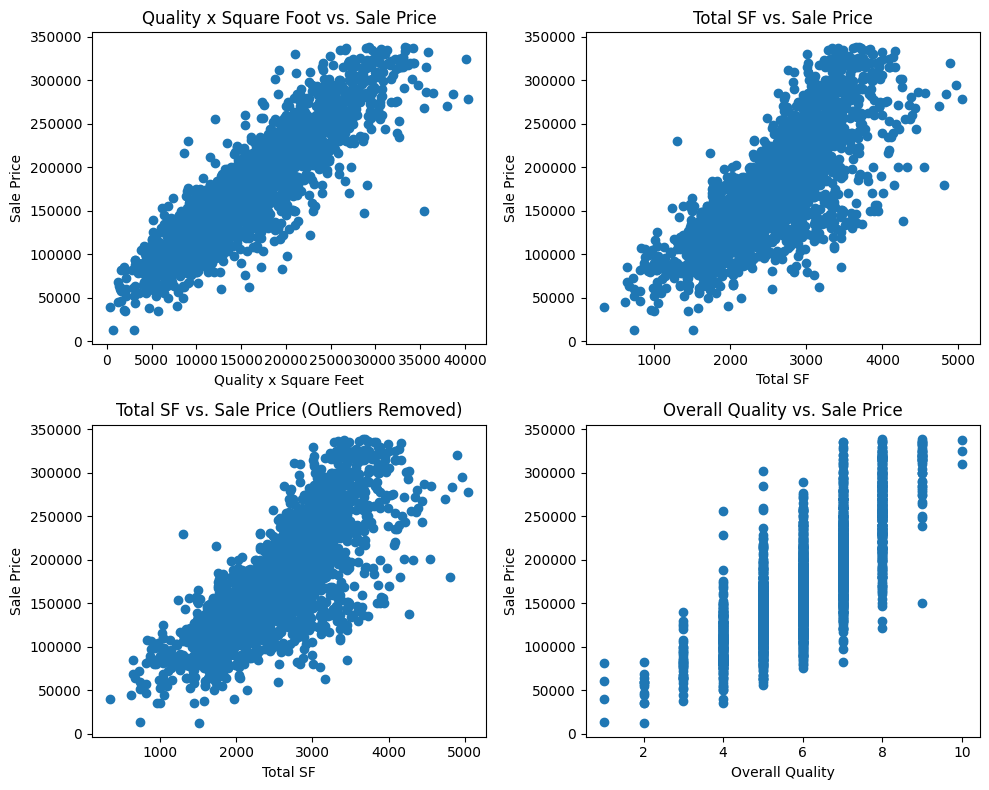

In [19]:
# drop values where Total SF > 6000 (3 total outliers)
df.drop(df[df['Total SF'] > 6000].index, inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))


axes[0, 0].scatter(df['Qual x SF'], df['SalePrice'])
axes[0, 0].set_title('Quality x Square Foot vs. Sale Price')
axes[0, 0].set_xlabel('Quality x Square Feet')
axes[0, 0].set_ylabel('Sale Price')


axes[0, 1].scatter(df['Total SF'], df['SalePrice'])
axes[0, 1].set_title('Total SF vs. Sale Price')
axes[0, 1].set_xlabel('Total SF')
axes[0, 1].set_ylabel('Sale Price')

axes[1, 0].scatter(df['Total SF'], df['SalePrice'])
axes[1, 0].set_title('Total SF vs. Sale Price (Outliers Removed)')
axes[1, 0].set_xlabel('Total SF')
axes[1, 0].set_ylabel('Sale Price')


axes[1, 1].scatter(df['Overall Qual'], df['SalePrice'])
axes[1, 1].set_title('Overall Quality vs. Sale Price')
axes[1, 1].set_xlabel('Overall Quality')
axes[1, 1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

In [20]:
# Encode
ordinal_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
    'Fin': 3,
    'Unf': 2,
    'RFn': 1,
    'Y': 1,
    'N': 0,
    'Typ': 8,
    'Min1': 7,
    'Min2': 6,
    'Mod': 5,
    'Maj1': 4,
    'Maj2': 3,
    'Sev': 2,
    'Sal': 1,
    'GdPrv': 2,
    'MnPrv': 1,
    'GdWo': 2,
    'MnWw': 1
}

for col in ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC',
            'Kitchen Qual', 'Fireplace Qu', 'Garage Finish','Functional',
            'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence']:
    df[col+'_Ord'] = df[col].map(ordinal_map).fillna(0)

# Correlation of SalePrice and Ordinal Map Encoded Features
ord_cols = [col for col in df.columns if '_Ord' in col]
corr_matrix = df[ord_cols + ['SalePrice']].corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
Exter Qual_Ord,0.664278
Kitchen Qual_Ord,0.629934
Bsmt Qual_Ord,0.584736
Fireplace Qu_Ord,0.513975
Heating QC_Ord,0.467647
Garage Qual_Ord,0.319544
Garage Cond_Ord,0.309355
Bsmt Cond_Ord,0.251469
Garage Finish_Ord,0.192933


In [21]:
# One Hot Encoding Nominal Variables
nominal_cols = [
    'Neighborhood','House Style','Bldg Type','Sale Condition','Sale Type',
    'Garage Type','Foundation','Exterior 1st','Exterior 2nd',
    'Roof Style','MS Zoning','Lot Shape','Lot Config','Condition 1'
]

# Any value that has an occurrence of less than 30, categorize as "Other"
def bundle_rare(s, min_count=30):
    vc = s.value_counts()
    return s.where(s.isin(vc[vc >= min_count].index), 'Other')

df_nom = df[nominal_cols].apply(bundle_rare)

dummies = pd.get_dummies(df_nom, drop_first=True, prefix_sep='__')
df = pd.concat([df, dummies], axis=1)

In [22]:
# Check dummy variables for point-biserial correlation
from scipy.stats import pointbiserialr

keep_dummy, drop_dummy = [], []

for col in dummies.columns:
    r, p = pointbiserialr(df[col], df['SalePrice'])
    if abs(r) >= 0.05 and p < 0.05:
        keep_dummy.append(col)
    else:
        drop_dummy.append(col)

print("Keep:", keep_dummy)
print("Drop:", drop_dummy)

Keep: ['Neighborhood__BrkSide', 'Neighborhood__ClearCr', 'Neighborhood__CollgCr', 'Neighborhood__Crawfor', 'Neighborhood__Edwards', 'Neighborhood__Gilbert', 'Neighborhood__IDOTRR', 'Neighborhood__MeadowV', 'Neighborhood__NAmes', 'Neighborhood__NWAmes', 'Neighborhood__NoRidge', 'Neighborhood__NridgHt', 'Neighborhood__OldTown', 'Neighborhood__Other', 'Neighborhood__SWISU', 'Neighborhood__Sawyer', 'Neighborhood__SawyerW', 'Neighborhood__Somerst', 'Neighborhood__Timber', 'House Style__2Story', 'House Style__SFoyer', 'Bldg Type__2fmCon', 'Bldg Type__Duplex', 'Bldg Type__Twnhs', 'Bldg Type__TwnhsE', 'Sale Condition__Other', 'Sale Condition__Partial', 'Sale Type__New', 'Sale Type__Other', 'Sale Type__WD ', 'Garage Type__BuiltIn', 'Garage Type__Detchd', 'Garage Type__Other', 'Foundation__CBlock', 'Foundation__PConc', 'Foundation__Slab', 'Exterior 1st__CemntBd', 'Exterior 1st__HdBoard', 'Exterior 1st__MetalSd', 'Exterior 1st__Stucco', 'Exterior 1st__VinylSd', 'Exterior 1st__Wd Sdng', 'Exterior 

## Final Output

Once we have one hot encoded our categorical features and screened for statistical significance, we will drop the features that do not meet our bar for further analysis. These again are:

* Pearson correlation coefficient |r| < 0.5 for both raw numerical features and engineered numerical features
* Pearson correlation coefficient |r| < 0.5 for ordinally mapped categorical features (e.g. Yes = 1, No = 0, Excellent = 5, None = 0 etc.)
* Missing values > 60%
* Redundant, almost constant, features with > 90% of the data corresponds to only 1 value.

There are a few exceptions, e.g. "Fireplace Quality" whose absence could be a useful signal in the models that will be evaluated in Phase 2 and Phase 3 of the project.

In [23]:
# Create final dataframe prepping for final output, and drop all columns that do
# not meet our heuristics

df_cleaned = df.drop(columns=['Order', 'PID', 'Street', 'Heating', 'Roof Matl',
                 'Electrical', 'Utilities', 'Alley', 'MS Zoning',
                  'Lot Frontage', 'Lot Area', 'Lot Shape', 'Land Contour',
                  'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
                  'Condition 2', 'Bldg Type', 'House Style', 'Overall Cond',
                  'Roof Style', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                  'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation',
                  'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin SF 1',
                  'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Heating QC',
                  'Central Air', '2nd Flr SF', 'Low Qual Fin SF',
                  'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath',
                  'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
                  'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
                  'Garage Type', 'Garage Qual', 'Garage Cond', 'Paved Drive',
                  'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
                  '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Pool QC',
                  'Fence', 'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold',
                  'Sale Type', 'Sale Condition', 'Number of Stories',
                  'Has Basement', 'Has Central Air', 'Has Pool',
                  'Has Fireplace', 'Has Porch', 'Has Deck', 'Has Garage',
                  'Has Remodeled', 'Exter Cond_Ord', 'Bsmt Cond_Ord',
                  'Garage Finish_Ord', 'Garage Qual_Ord', 'Garage Cond_Ord',
                  'Pool QC_Ord', 'Fence_Ord'])

df_cleaned = df_cleaned.drop(columns=drop_dummy)

df_cleaned.head()

,MS SubClass,Overall Qual,Year Built,Year Remod/Add,BsmtFin Type 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,SalePrice,SaleDate,House Age,Remodel Age,Age Bucket,Total SF,Total SF Plus Garage,Total Baths,Price per SF,Qual x SF,Season Sold,Exter Qual_Ord,Bsmt Qual_Ord,Heating QC_Ord,Kitchen Qual_Ord,Fireplace Qu_Ord,Functional_Ord,Neighborhood__BrkSide,Neighborhood__ClearCr,Neighborhood__CollgCr,Neighborhood__Crawfor,Neighborhood__Edwards,Neighborhood__Gilbert,Neighborhood__IDOTRR,Neighborhood__MeadowV,Neighborhood__NAmes,Neighborhood__NWAmes,Neighborhood__NoRidge,Neighborhood__NridgHt,Neighborhood__OldTown,Neighborhood__Other,Neighborhood__SWISU,Neighborhood__Sawyer,Neighborhood__SawyerW,Neighborhood__Somerst,Neighborhood__Timber,House Style__2Story,House Style__SFoyer,Bldg Type__2fmCon,Bldg Type__Duplex,Bldg Type__Twnhs,Bldg Type__TwnhsE,Sale Condition__Other,Sale Condition__Partial,Sale Type__New,Sale Type__Other,Sale Type__WD,Garage Type__BuiltIn,Garage Type__Detchd,Garage Type__Other,Foundation__CBlock,Foundation__PConc,Foundation__Slab,Exterior 1st__CemntBd,Exterior 1st__HdBoard,Exterior 1st__MetalSd,Exterior 1st__Stucco,Exterior 1st__VinylSd,Exterior 1st__Wd Sdng,Exterior 1st__WdShing,Exterior 2nd__CmentBd,Exterior 2nd__HdBoard,Exterior 2nd__MetalSd,Exterior 2nd__Stucco,Exterior 2nd__VinylSd,Exterior 2nd__Wd Sdng,Exterior 2nd__Wd Shng,Roof Style__Hip,MS Zoning__Other,MS Zoning__RL,MS Zoning__RM,Lot Shape__IR2,Lot Shape__Reg,Lot Config__CulDSac,Lot Config__Inside,Condition 1__Feedr,Condition 1__Norm,Condition 1__PosN
0,20,6,1960,1960,BLQ,1080.0,1656,1656,1,1960.0,Fin,2.0,528.0,215000,2010-05-01,50,50,30-60,2736.0,3264.0,1.0,78.581871,16416.0,Spring,3,3.0,2,3,4.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False
1,20,5,1961,1961,Rec,882.0,896,896,1,1961.0,Unf,1.0,730.0,105000,2010-06-01,49,49,30-60,1778.0,2508.0,1.0,59.055118,8890.0,Summer,3,3.0,3,3,0.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,True,True,False,False
2,20,6,1958,1958,ALQ,1329.0,1329,1329,1,1958.0,Unf,1.0,312.0,172000,2010-06-01,52,52,30-60,2658.0,2970.0,1.5,64.710309,15948.0,Summer,3,3.0,3,4,0.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False
3,20,7,1968,1968,ALQ,2110.0,2110,2110,2,1968.0,Fin,2.0,522.0,244000,2010-04-01,42,42,30-60,4220.0,4742.0,2.5,57.819905,29540.0,Spring,4,3.0,5,5,3.0,8,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False
4,60,5,1997,1998,GLQ,928.0,928,1629,2,1997.0,Fin,2.0,482.0,189900,2010-03-01,13,12,11-30,2557.0,3039.0,2.5,74.266719,12785.0,Spring,3,4.0,4,3,3.0,8,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,

## Conducting Early Trials

First, we will use a single linear regression model to evaluate the Quality x Square Feet feature. We do not anticipate this will be as strong as multiple linear regression or classifier models.

Text(0, 0.5, 'Sale Price')

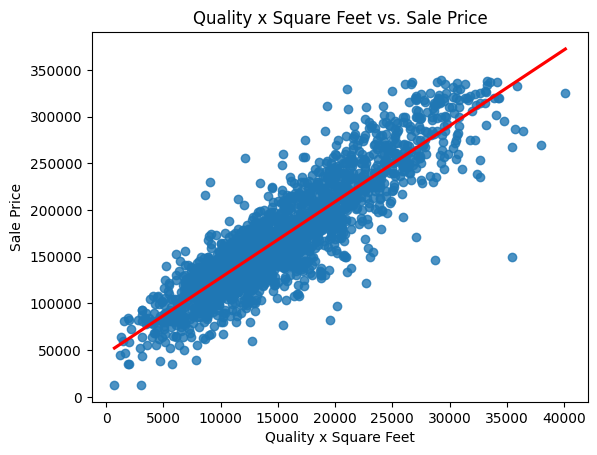

In [24]:
# conduct early trial, reviewing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# drop values where Total SF > 6000 (3 total outliers)
df_cleaned.drop(df_cleaned[df_cleaned['Total SF'] > 6000].index, inplace=True)

# drop values where Qual x SF is NaN (one record)
df_cleaned.dropna(subset=['Qual x SF'], inplace=True)

# Set seed
seed = 123

# Percent of data reserved for test set
test_p = 0.20

# Set the features
X = df_cleaned[['Qual x SF']]
y = df_cleaned['SalePrice']

# Define training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_p, random_state=seed
)

# Plot training and regression
plt = sns.regplot(x=X_train, y=y_train, ci=False, line_kws={'color': 'red'})
plt.set_title('Quality x Square Feet vs. Sale Price')
plt.set_xlabel('Quality x Square Feet')
plt.set_ylabel('Sale Price')

In [25]:
# Initialize linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print model coefficients
print("Model Coefficients:")
print(model.coef_)
print("Model Intercept:")
print(model.intercept_)

Model Coefficients:
[8.12923164]
Model Intercept:
46295.48310379297


In [26]:
# Regression w/ training data
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Print the results
print("Training Results:")
print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")
print(f"Mean Absolute Error: {mae_train}")

Training Results:
Mean Squared Error: 706248369.1210846
R-squared: 0.7995999986704591
Mean Absolute Error: 19937.40665540983


In [27]:
# Regression w/ test data
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Test Results:")
print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")
print(f"Mean Absolute Error: {mae_test}")

Test Results:
Mean Squared Error: 754266947.822695
R-squared: 0.771094329227044
Mean Absolute Error: 19996.79010626201


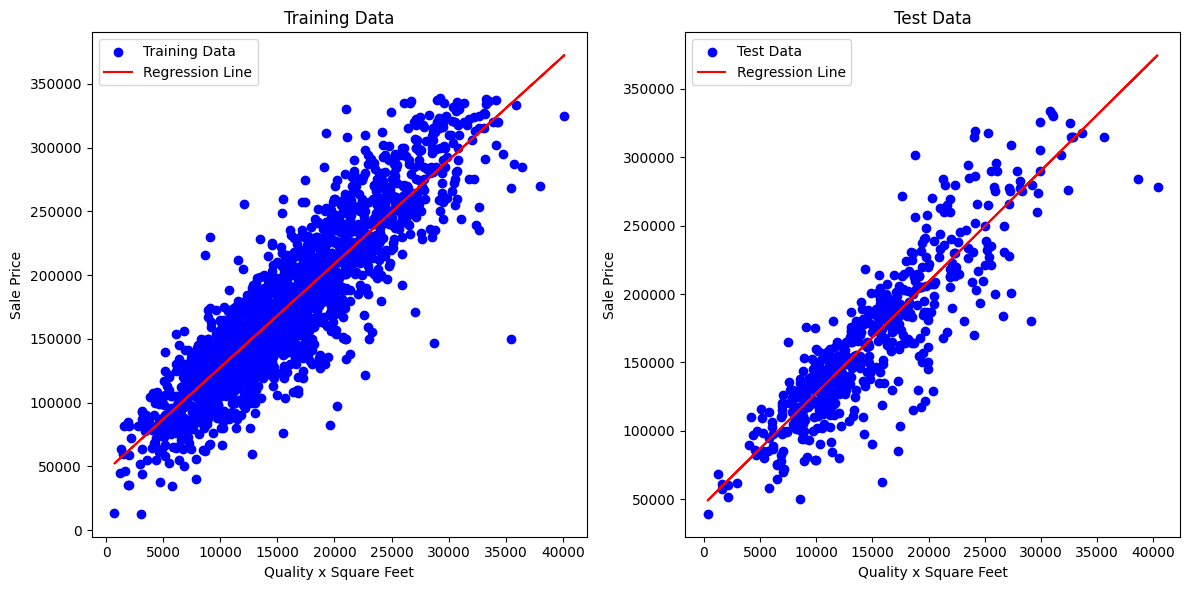

In [28]:
# Plot test and train using subplots
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Use model coefficient and y-intercept to define formula for yhat
yhat_train = model.coef_[0] * X_train + model.intercept_

# Plot training
axes[0].scatter(X_train, y_train, color='blue', label='Training Data')
axes[0].plot(X_train, yhat_train, color='red', label='Regression Line')
axes[0].set_title('Training Data')
axes[0].set_xlabel('Quality x Square Feet')
axes[0].set_ylabel('Sale Price')
axes[0].legend()

# Plot test
yhat_test = model.coef_[0] * X_test + model.intercept_
axes[1].scatter(X_test, y_test, color='blue', label='Test Data')
axes[1].plot(X_test, yhat_test, color='red', label='Regression Line')
axes[1].set_title('Test Data')
axes[1].set_xlabel('Quality x Square Feet')
axes[1].set_ylabel('Sale Price')
axes[1].legend()

plt.tight_layout()
plt.show()

In [29]:
# export df_cleaned to csv
df_cleaned.to_csv('ACS-5113_Petabyte_Pirates_Deliverable_1.csv', index=False)